# Práctica 2 - Limpieza y análisis de los datos
##Autores:


*   Marcos Gómez Vázquez
*   Mario Bru Barrero

## Dataset: Heart attack analysis prediction
Kaggle: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset



## Librerías utilizadas

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

## Análisis exploratorio inicial

Echamos un primer vistazo a los datos:

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Comprobamos el tipo de datos, el número total de registros y si hay nulos:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


No hay ningún dato nulo en el dataset. Vamos a analizarlo estadísticamente:

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Vamos a echar un vistazo gráficamente a cada variable:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ffc17fa00>,
      dtype=object)

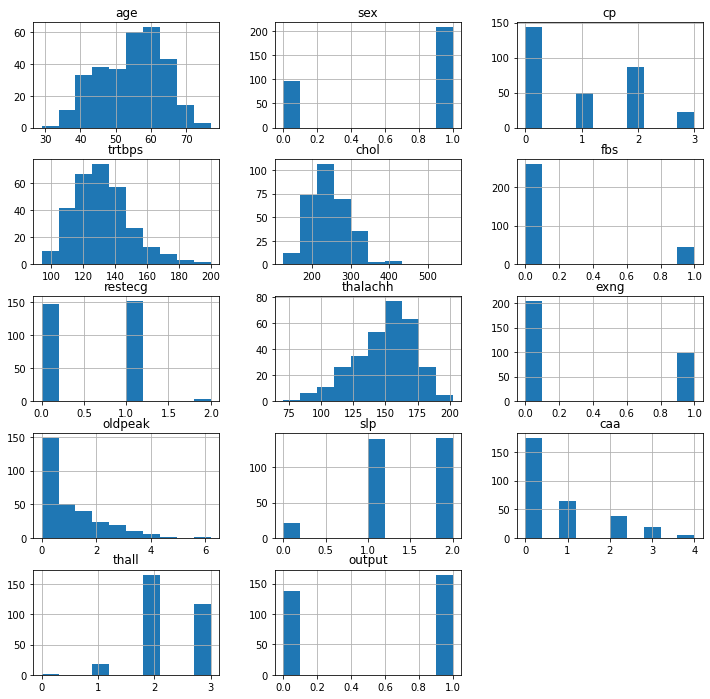

In [ ]:
df.hist(figsize=(12,12), layout=(5,3))

## Limpieza de datos

### Registros duplicados

Veamos si existen registros duplicados:

In [ ]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


Tan solo tenemos una fila duplicada, procedemos a borrarla:

In [ ]:
df = df.drop([164])

### Detección de outliers

A continuación vamos a intentar detectar outliers utilizando la información visual del IQR que nos proporciona el gráfico tipo *boxplot*:

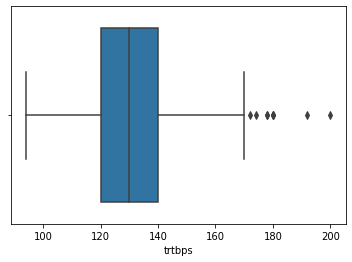

In [ ]:
sns.boxplot(x=df['trtbps'])


Se observan algunos outliers para la variable 'trtbps' (presión arterial en reposo)

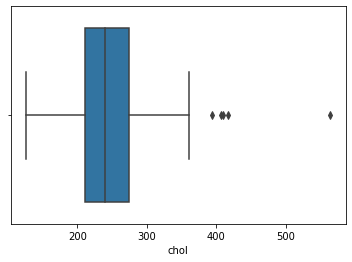

In [ ]:
sns.boxplot(x=df['chol'])

También hallamos outliers presentes en la mediciones de colesterol.

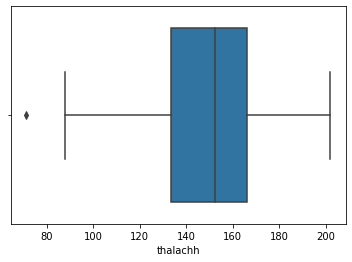

In [ ]:
sns.boxplot(x=df['thalachh'])

También encontramos un outlier para el caso de los registros de máxima frecuencia cardíaca (thalachh)

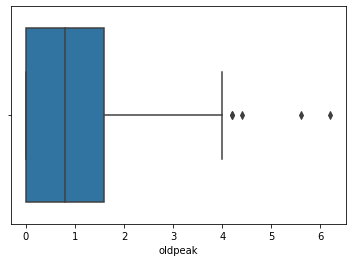

In [ ]:
sns.boxplot(x=df['oldpeak'])

Así como para la variable 'oldpeak'

Para eliminar los *outliers*, utilizaremos una normalización **Z-score**:

In [ ]:
df.shape

(302, 14)

In [ ]:
z = np.abs(stats.zscore(df))
df = df[(z<3).all(axis=1)]
df.shape

(287, 14)

## Discretización

Vamos a discretizar la variable 'age' para simplificar por rangos de edades:

In [ ]:
df['age_range'] = pd.cut(x=df['age'], bins=[20, 29, 39, 49, 59, 69, 79], labels=[2, 3, 4, 5, 6, 7])

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_range
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,3
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,4
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,5
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,5


## Exportación de los datos preprocesados

Una vez completadas las tareas de limpieza, procedemos a exportar el dataset resultante:

In [ ]:
df.to_csv('heart_clean.csv')  

## Comprobación de la normalidad

En estos tests, la obtención de un p-value menor que 0.05 indica que hay evidencias suficientes para rechazar la normalidad de una variable.


In [ ]:
# Shapiro-Wilk test
for column in df:
  if df[column].dtype in [np.int64, np.float64]:
    statistic, p_value = stats.shapiro(df[column])
    print(f"Estadístico = {statistic}, p-value = {p_value} ({column})")

Estadístico = 0.9869363903999329, p-value = 0.010563818737864494 (age)
Estadístico = 0.5817572474479675, p-value = 9.557173742566581e-26 (sex)
Estadístico = 0.7918967008590698, p-value = 7.494841063025929e-19 (cp)
Estadístico = 0.9731232523918152, p-value = 3.227563502150588e-05 (trtbps)
Estadístico = 0.9935663938522339, p-value = 0.2589332163333893 (chol)
Estadístico = 0.4155809283256531, p-value = 1.8541654312243372e-29 (fbs)
Estadístico = 0.68099045753479, p-value = 6.192736704093885e-23 (restecg)
Estadístico = 0.9758883714675903, p-value = 9.15627388167195e-05 (thalachh)
Estadístico = 0.5916847586631775, p-value = 1.7246563985031701e-25 (exng)
Estadístico = 0.858328104019165, p-value = 1.522204180060124e-15 (oldpeak)
Estadístico = 0.7395079731941223, p-value = 6.058172659419991e-21 (slp)
Estadístico = 0.7161264419555664, p-value = 8.910139748260636e-22 (caa)
Estadístico = 0.742233157157898, p-value = 7.638344103853779e-21 (thall)
Estadístico = 0.6327577829360962, p-value = 2.248375

In [ ]:
# D'Agostino's K-squared test
for column in df:
  if df[column].dtype in [np.int64, np.float64]:
    statistic, p_value = stats.normaltest(df[column])
    print(f"Estadístico = {statistic}, p-value = {p_value} ({column})")

Estadístico = 7.814694785634158, p-value = 0.020093731206870278 (age)
Estadístico = 430.3434535388764, p-value = 3.565384748914572e-94 (sex)
Estadístico = 147.7320894836269, p-value = 8.325002423603838e-33 (cp)
Estadístico = 13.326457831551762, p-value = 0.0012770163280254115 (trtbps)
Estadístico = 3.040732108818098, p-value = 0.21863184115313714 (chol)
Estadístico = 112.15766732803098, p-value = 4.418470788773278e-25 (fbs)
Estadístico = 456.9560420385916, p-value = 5.932752556534028e-100 (restecg)
Estadístico = 11.753054408839876, p-value = 0.002804507865500355 (thalachh)
Estadístico = 6885.949807025316, p-value = 0.0 (exng)
Estadístico = 35.62598758422013, p-value = 1.836179311862015e-08 (oldpeak)
Estadístico = 21.139334906937464, p-value = 2.5683354686402022e-05 (slp)
Estadístico = 49.166871475939054, p-value = 2.1064420352428415e-11 (caa)
Estadístico = 10.861776054946075, p-value = 0.004379205220906467 (thall)
Estadístico = 1401.6609726460417, p-value = 4.2972145776434936e-305 (out

## Homocedasticidad

Al igual que con los tests de normalidad,la obtención de un p-value menor que 0.05 indica que hay evidencias suficientes para rechazar la hipótesis de que los grupos de hombres y mujeres tienen la misma varianza



In [ ]:
cols = ['age', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']

for col in cols:
  x_men = df.loc[df['sex'] == 1, col]
  x_women = df.loc[df['sex'] == 0, col]

  # Levene test

  statistic, p_value = stats.levene(x_men, x_women, center='median')
  print(f"[    Levene     ] Estadístico = {statistic}, p-value = {p_value} ({col})")

  # Fligner-Killeen test

  statistic, p_value = stats.fligner(x_men, x_women, center='median')
  print(f"[Fligner-Killeen] Estadístico = {statistic}, p-value = {p_value} ({col})")


[    Levene     ] Estadístico = 0.7991050396689253, p-value = 0.3721153393278205 (age)
[Fligner-Killeen] Estadístico = 1.093720888064872, p-value = 0.2956482484321211 (age)
[    Levene     ] Estadístico = 0.6025072703165844, p-value = 0.43826666489816224 (cp)
[Fligner-Killeen] Estadístico = 1.367718882842982, p-value = 0.24220419812638222 (cp)
[    Levene     ] Estadístico = 0.6162638871157233, p-value = 0.4330911171578048 (trtbps)
[Fligner-Killeen] Estadístico = 0.5136358570115466, p-value = 0.47356914313371823 (trtbps)
[    Levene     ] Estadístico = 3.5481979884458466, p-value = 0.060628140228618024 (chol)
[Fligner-Killeen] Estadístico = 3.450528880885329, p-value = 0.06323153371473311 (chol)
[    Levene     ] Estadístico = 0.9764071708534614, p-value = 0.32392558609235933 (fbs)
[Fligner-Killeen] Estadístico = 0.9764877236787444, p-value = 0.323067471646143 (fbs)
[    Levene     ] Estadístico = 0.49302192947431284, p-value = 0.48315542033888936 (restecg)
[Fligner-Killeen] Estadístic

## Análisis y comparación de los diferentes grupos de datos

Vamos a proceder con un análisis gráfico para detectar posibles relaciones entre variables. Empezamos por la relación entre sexo, edad y el output:

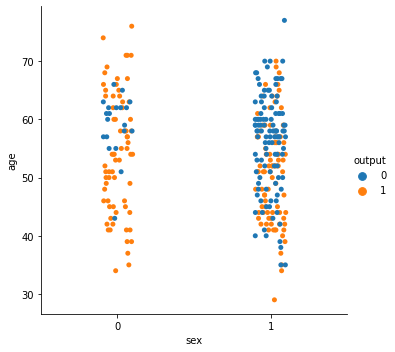

In [ ]:
sns.catplot(data=df, x='sex', y='age', hue='output')

De esta gráfica interpretamos que los hombres son menos propensos a tener enfermedades del corazón que las mujeres.

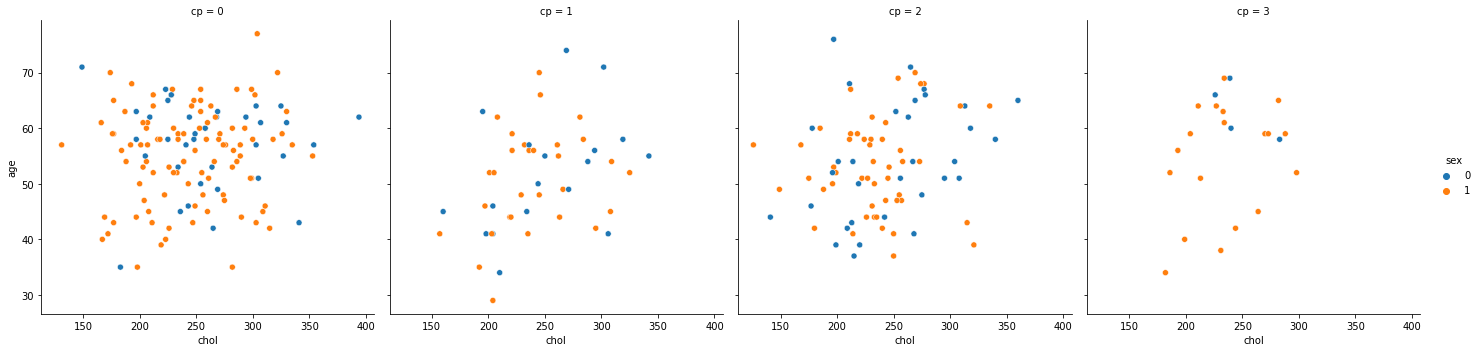

In [ ]:
sns.relplot(x='chol', y='age', hue='sex', data=df, col='cp')

Del resultado anterior podemos deducir que las personas entre 50 y 65 años experimentan cp = 0 (angina típica), que es el dolor más común entre la lista.

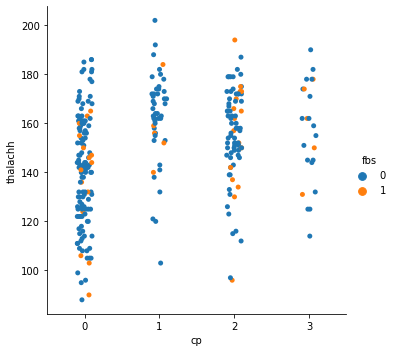

In [ ]:
sns.catplot(data=df, x='cp', y='thalachh', hue='fbs')

Del gráfico categórico anterior podemos deducir que cp[0] es el dolor en el pecho más habitual que experimentan los pacientes, seguido de cp[2], cp[1] y, por último, cp[3]. también podemos ver que el nivel de azúcar en sangre en ayunas (fbs) está por debajo de 120, lo que significa que la mayoría de los fbs del paciente no están por encima de 120.

## Estudio de la correlación

Utilizaremos los dos tipos de correlación explicados en la asignatura:


*   Correlación de **Pearson**
*   Correlación de **Spearman**



In [ ]:
pearsonCorr = df.corr(method='pearson')
spearmanCorr = df.corr(method='spearman')

Correlación de Pearson:

Text(0.5, 1.0, 'Correlación de Pearson')

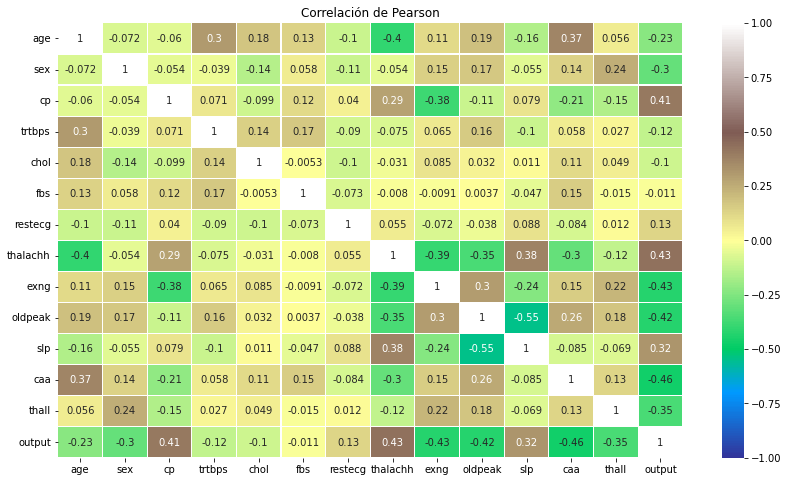

In [ ]:
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "terrain", annot=True, linewidth=0.1)
plt.title("Correlación de Pearson")

Correlación de Spearman:

Text(0.5, 1.0, 'Correlación de Spearman')

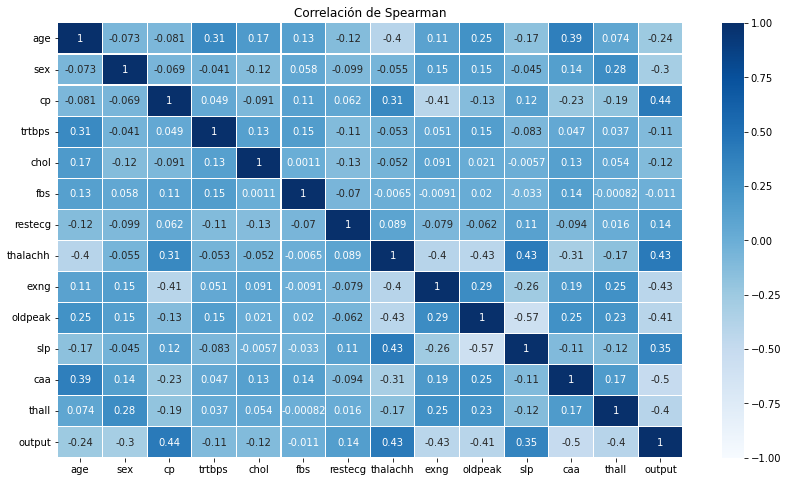

In [ ]:
fig = plt.subplots(figsize=(14,8))
sns.heatmap(spearmanCorr, vmin=-1,vmax=1, cmap = "Blues", annot=True, linewidth=0.1)
plt.title("Correlación de Spearman")

En ambas observamos una correlación positiva entre 'output' y 'cp', 'thalachh', 'slp'


Ahora vamos a visualizar las correlaciones en los grupos de hombres y mujeres. Así veremos si existe alguna diferencia entre los grupos

In [ ]:
df_men = df.loc[df['sex'] == 1]
df_women = df.loc[df['sex'] == 0]

pearsonCorr_men = df_men.corr(method='pearson')
spearmanCorr_men = df_men.corr(method='spearman')

pearsonCorr_women = df_women.corr(method='pearson')
spearmanCorr_women = df_women.corr(method='spearman')

Correlación de Pearson (hombres)

Text(0.5, 1.0, 'Correlación de Pearson (hombres)')

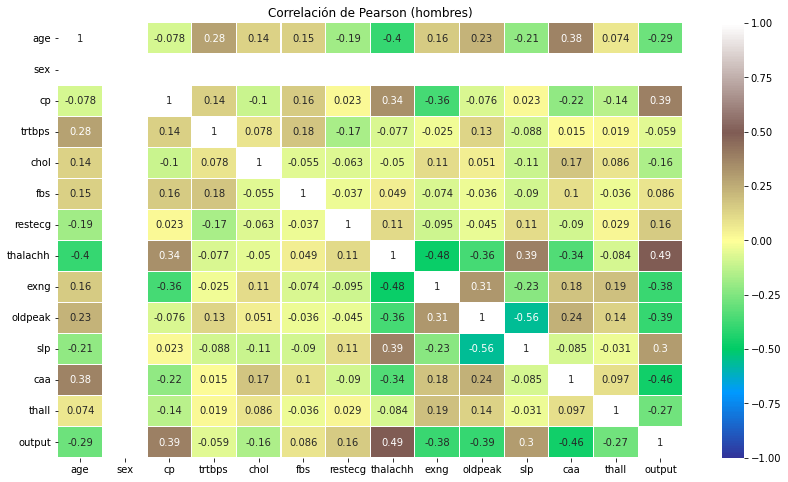

In [ ]:
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pearsonCorr_men, vmin=-1,vmax=1, cmap = "terrain", annot=True, linewidth=0.1)
plt.title("Correlación de Pearson (hombres)")

Correlación de Pearson (mujeres)

Text(0.5, 1.0, 'Correlación de Pearson (mujeres)')

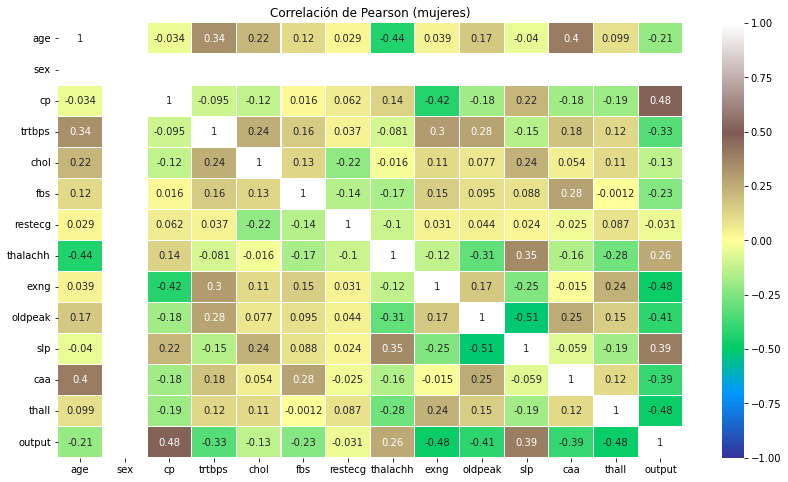

In [ ]:
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pearsonCorr_women, vmin=-1,vmax=1, cmap = "terrain", annot=True, linewidth=0.1)
plt.title("Correlación de Pearson (mujeres)")

Correlación de Spearman (hombres)

Text(0.5, 1.0, 'Correlación de Spearman (mujeres)')

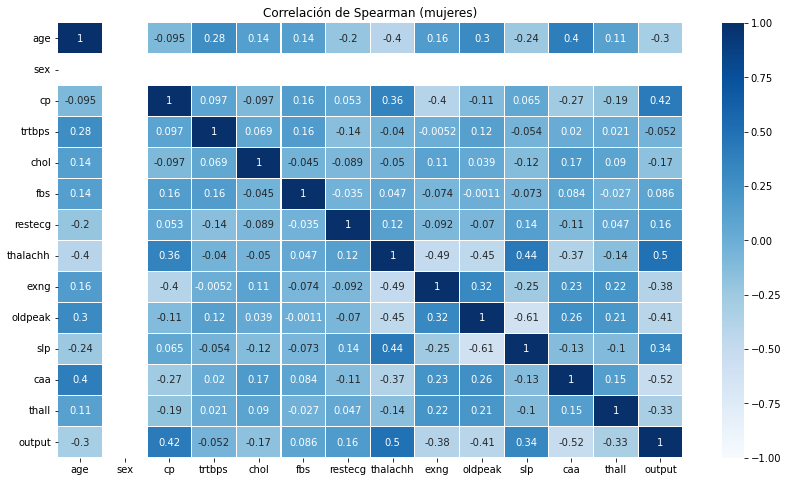

In [ ]:
fig = plt.subplots(figsize=(14,8))
sns.heatmap(spearmanCorr_men, vmin=-1,vmax=1, cmap = "Blues", annot=True, linewidth=0.1)
plt.title("Correlación de Spearman (mujeres)")

Correlación de Spearman (mujeres)

Text(0.5, 1.0, 'Correlación de Spearman (mujeres)')

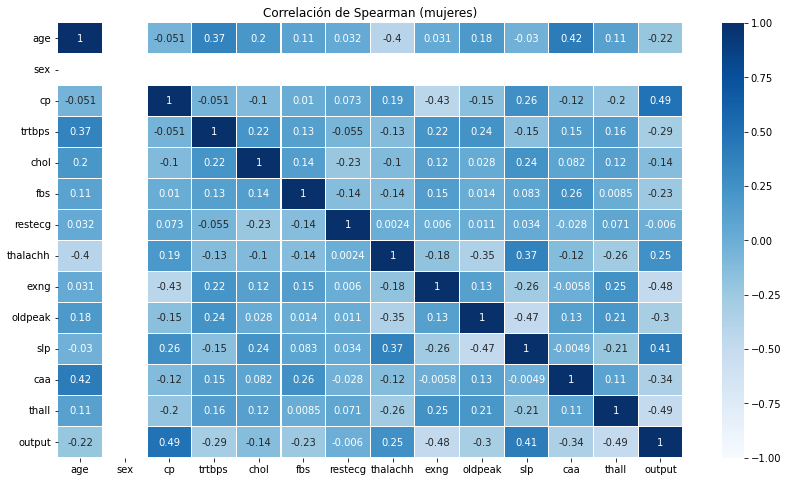

In [ ]:
fig = plt.subplots(figsize=(14,8))
sns.heatmap(spearmanCorr_women, vmin=-1,vmax=1, cmap = "Blues", annot=True, linewidth=0.1)
plt.title("Correlación de Spearman (mujeres)")

## Modelo de regresión logística

X contiene las variables e Y la variable objetivo. Dividimos los datos en conjunto de entrenamiento y de testeo

In [ ]:
y = df['output']
x = df.loc[:, ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)
print('Shape for training data', x_train.shape, y_train.shape)
print('Shape for testing data', x_test.shape, y_test.shape)

Shape for training data (229, 13) (229,)
Shape for testing data (58, 13) (58,)


Inicializamos el modelo y lo entrenamos con los datos

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

Finalmente, evaluamos el modelo mediante los datos de testeo y visualizamos los true positives / true negatives / false positives / false negatives mediante una matriz de confusión

The accuracy of Logistic Regression is :  87.93103448275862 %


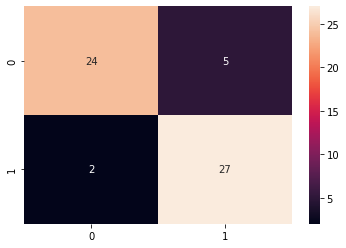

In [ ]:
predicted = model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
sns.heatmap(conf, annot=True)